In [14]:
#define variables
a0, a1, a2, a3, a4, a5, a6 = var('a0 a1 a2 a3 a4 a5 a6')

In [73]:
# the potential energy function, generated by generate_equation.py
pot(a0, a1, a2, a3, a4, a5, a6) = 1^-5*(-3*(1*cos(a0)+0*sin(a0))*(1*cos(a1)+0*sin(a1))) +1^-3*(cos(a0)*cos(a1)+sin(a0)*sin(a1))+1^-5*(-3*(1/2*cos(a0)+1*sqrt(3)/2*sin(a0))*(1/2*cos(a2)+1*sqrt(3)/2*sin(a2))) +1^-3*(cos(a0)*cos(a2)+sin(a0)*sin(a2))+1^-5*(-3*(-3/6*cos(a0)+1*sqrt(3)/2*sin(a0))*(-3/6*cos(a3)+1*sqrt(3)/2*sin(a3))) +1^-3*(cos(a0)*cos(a3)+sin(a0)*sin(a3))+1^-5*(-3*(-6/6*cos(a0)+0*sin(a0))*(-6/6*cos(a4)+0*sin(a4))) +1^-3*(cos(a0)*cos(a4)+sin(a0)*sin(a4))+1^-5*(-3*(-3/6*cos(a0)+-3*sqrt(3)/6*sin(a0))*(-3/6*cos(a5)+-3*sqrt(3)/6*sin(a5))) +1^-3*(cos(a0)*cos(a5)+sin(a0)*sin(a5))+1^-5*(-3*(1/2*cos(a0)+-3*sqrt(3)/6*sin(a0))*(1/2*cos(a6)+-3*sqrt(3)/6*sin(a6))) +1^-3*(cos(a0)*cos(a6)+sin(a0)*sin(a6))+1^-5*(-3*(-3/6*cos(a1)+1*sqrt(3)/2*sin(a1))*(-3/6*cos(a2)+1*sqrt(3)/2*sin(a2))) +1^-3*(cos(a1)*cos(a2)+sin(a1)*sin(a2))+sqrt(3)/27*(-3*(-6/4*cos(a1)+1*sqrt(3)/2*sin(a1))*(-6/4*cos(a3)+1*sqrt(3)/2*sin(a3))) +sqrt(3)/9*(cos(a1)*cos(a3)+sin(a1)*sin(a3))+2^-5*(-3*(-6/3*cos(a1)+0*sin(a1))*(-6/3*cos(a4)+0*sin(a4))) +2^-3*(cos(a1)*cos(a4)+sin(a1)*sin(a4))+sqrt(3)/27*(-3*(-6/4*cos(a1)+-3*sqrt(3)/6*sin(a1))*(-6/4*cos(a5)+-3*sqrt(3)/6*sin(a5))) +sqrt(3)/9*(cos(a1)*cos(a5)+sin(a1)*sin(a5))+1^-5*(-3*(-3/6*cos(a1)+-3*sqrt(3)/6*sin(a1))*(-3/6*cos(a6)+-3*sqrt(3)/6*sin(a6))) +1^-3*(cos(a1)*cos(a6)+sin(a1)*sin(a6))+1^-5*(-3*(-6/6*cos(a2)+0*sin(a2))*(-6/6*cos(a3)+0*sin(a3))) +1^-3*(cos(a2)*cos(a3)+sin(a2)*sin(a3))+sqrt(3)/27*(-3*(-6/4*cos(a2)+-3*sqrt(3)/6*sin(a2))*(-6/4*cos(a4)+-3*sqrt(3)/6*sin(a4))) +sqrt(3)/9*(cos(a2)*cos(a4)+sin(a2)*sin(a4))+2^-5*(-3*(-6/6*cos(a2)+-6*sqrt(3)/6*sin(a2))*(-6/6*cos(a5)+-6*sqrt(3)/6*sin(a5))) +2^-3*(cos(a2)*cos(a5)+sin(a2)*sin(a5))+sqrt(3)/27*(-3*(0*cos(a2)+-6*sqrt(3)/6*sin(a2))*(0*cos(a6)+-6*sqrt(3)/6*sin(a6))) +sqrt(3)/9*(cos(a2)*cos(a6)+sin(a2)*sin(a6))+1^-5*(-3*(-3/6*cos(a3)+-3*sqrt(3)/6*sin(a3))*(-3/6*cos(a4)+-3*sqrt(3)/6*sin(a4))) +1^-3*(cos(a3)*cos(a4)+sin(a3)*sin(a4))+sqrt(3)/27*(-3*(0*cos(a3)+-6*sqrt(3)/6*sin(a3))*(0*cos(a5)+-6*sqrt(3)/6*sin(a5))) +sqrt(3)/9*(cos(a3)*cos(a5)+sin(a3)*sin(a5))+2^-5*(-3*(1*cos(a3)+-6*sqrt(3)/6*sin(a3))*(1*cos(a6)+-6*sqrt(3)/6*sin(a6))) +2^-3*(cos(a3)*cos(a6)+sin(a3)*sin(a6))+1^-5*(-3*(1/2*cos(a4)+-3*sqrt(3)/6*sin(a4))*(1/2*cos(a5)+-3*sqrt(3)/6*sin(a5))) +1^-3*(cos(a4)*cos(a5)+sin(a4)*sin(a5))+sqrt(3)/27*(-3*(3/2*cos(a4)+-3*sqrt(3)/6*sin(a4))*(3/2*cos(a6)+-3*sqrt(3)/6*sin(a6))) +sqrt(3)/9*(cos(a4)*cos(a6)+sin(a4)*sin(a6))+1^-5*(-3*(1*cos(a5)+0*sin(a5))*(1*cos(a6)+0*sin(a6))) +1^-3*(cos(a5)*cos(a6)+sin(a5)*sin(a6))
pot = pot.expand()

In [74]:
# build the sum of squares of torques function, f
f = sum(k*k for k in pot.diff())

In [75]:
# matrix derivative - for second derivative test
H = pot.diff(2)

In [77]:
def has_seen(seen_u, u):
    for x in seen_u:
        if abs(x-u) < 0.00001:
            return True
        
    return False

# seen_u: array of the potential energies of the solutions that have been found
# seen: array of the corresponding rotations for each solution
seen_u = []
seen = []

import random
import numpy as np
for i in range(1, 100):
    if not i % 1000:
        print('   '+str(i))
    sol = minimize(f, [random.uniform(0, np.pi/6), random.uniform(0, 2*np.pi), random.uniform(0, 2*np.pi), random.uniform(0, 2*np.pi), random.uniform(0, 2*np.pi), random.uniform(0, 2*np.pi), random.uniform(0, 2*np.pi)])
    u = pot(sol[0], sol[1], sol[2], sol[3], sol[4], sol[5], sol[6]).n()
    if not has_seen(seen_u, u):
        tau = f(sol[0], sol[1], sol[2], sol[3], sol[4], sol[5], sol[6]).n()
        seen_u.append(u)
        seen.append(sol)
        print('candidate solution no.'+str(len(seen))+' found on iter.'+str(int(i)))
        print('     u='+str(float(u)) + '; tau^2=' + str(float(tau)))
        
        print('    ' + str(sol))
print(seen_u)
print(seen)


candidate solution no.1 found on iter.1
     u=11.9234266338; tau^2=5.82045497085e-13
    (-4.318209745520494e-07, 3.141592143974643, 4.201106492601764, 0.804878027570263, 3.1415930661676312, 5.478308594703474, 2.082080522789574)
candidate solution no.2 found on iter.2
     u=11.2018990924; tau^2=7.25194982055e-15
    (0.5235987635338695, 2.063809618088873, 5.266573239178119, 3.6651914403918644, 2.0638096089053377, 5.266573267440476, 3.665191395357806)
candidate solution no.3 found on iter.3
     u=5.54434542156; tau^2=1.2377051903
    (1.0471975913069074, 5.07527904485133, 3.112036936791227, 6.125492269315469, 2.2520881292086963, 5.265543481722062, 3.302301328461043)
candidate solution no.4 found on iter.4
     u=3.70390461006; tau^2=5.5704721383e-14
    (0.9261810653883404, -1.3180816037891525, 6.381892453600501, 5.675731385273021, 2.8432542907286553, 4.114255728129692, 6.234071600369289)
candidate solution no.5 found on iter.5
     u=-5.36872097982; tau^2=5.06844187062e-12
    (0.65

In [78]:
print(len(seen_u))
sorted_u = sorted(seen_u)
print(sorted_u)
indeces = [seen_u.index(x) for x in sorted_u]
sorted_sols = [seen[i] for i in indeces]

47
[-13.5698414744426, -8.85260056149566, -8.11313994857632, -7.99115260569417, -7.93186244583590, -7.67611940831229, -7.33593570518172, -7.33445762920926, -7.24820809974283, -7.19415761173897, -6.85304870300766, -6.74053487457114, -6.62812418111474, -6.50164343172484, -6.27208267651271, -6.22206319307843, -6.09732413025093, -5.44112569834022, -5.36872097981700, -4.98440343952391, -2.80466327768004, -1.47842949631759, -1.22603327146919, -1.17796924313538, -0.728515432497157, -0.695526700559523, -0.284959938608362, 0.216147715559426, 0.400118319340259, 0.786542452591626, 2.23347697483997, 2.57042658609988, 2.61839889551832, 3.70390461005686, 4.12660883740497, 5.54434542156409, 7.53674723009256, 7.54309055729313, 10.5661209845256, 11.0854075265475, 11.2018990923589, 11.4517871095755, 11.4971269423258, 11.7937621529035, 11.9091849455606, 11.9234266338325, 12.8646982107718]


In [79]:
import matplotlib.pyplot as plt
def display_balls(positions, rotations, u, tau):
    n = len(positions)
    circles = [plt.Circle((positions[i][0], positions[i][1]), 0.5, color='gray', ec = 'k') for i in range(len(positions))]

    fig, ax = plt.subplots(figsize=(5, 5)) # note we must use plt.subplots, not plt.subplot

    ax.set_aspect('equal')
    ax.set_ylim(-5, 5)
    ax.set_xlim(-5, 5)

    for c in circles:
        ax.add_artist(c)

    X = np.array([float(p[0]) for p in positions])
    Y = np.array([float(p[1]) for p in positions])
    U = np.array([float(r[0]) for r in rotations])
    V = np.array([float(r[1]) for r in rotations])
    X -= U/2
    Y -= V/2
    ax.quiver(X, Y, U, V, units='xy', scale=1, color='r', zorder=10)
    
    dx, dy = 0,0
    for x in rotations:
        dx+=x[0]
        dy+=x[1]
    
    plt.text(int(-4), int(-4), 'U='+str(u)+'\nm='+str(sqrt(dx*dx+dy*dy))+'\ntau^2='+str(tau), color='k')
    plt.show()

In [80]:
def interpret_eigen(x):
    p = 0
    n = 0
    for k in x:
        if k < 0:
            n+=1
        if k > 0:
            p+=1
    if n == 0:
        return 'local minimum'
    if p == 0:
        return 'local maximum'
    return 'saddle point'

In [81]:
def d_hex(sol):
    
    positions = [[0, 0]]+[[np.cos(x*np.pi/3), np.sin(x*np.pi/3)] for x in range(6)]
    rotations = [[np.cos(x), np.sin(x)] for x in sol]
    u= (pot(sol[0], sol[1], sol[2], sol[3], sol[4], sol[5], sol[6]).n())
    tau= float(f(sol[0], sol[1], sol[2], sol[3], sol[4], sol[5], sol[6]).n())
    eigens = H(a0=sol[0], a1=sol[1], a2=sol[2], a3=sol[3], a4=sol[4], a5=sol[5], a6=sol[6]).n().eigenvalues()
    #print('eigens='+str(eigens))
    print('solution:'+ str(sol)+ '\nnature = '+interpret_eigen(eigens))
    display_balls(positions, rotations, u, tau)

solution no.:1
solution:(1.570795735613681, 4.71238906618764, 6.081251070464952, 0.9273469734285553, 1.5707958425805684, 2.214245510599656, 3.3435273347243677)
nature = saddle point


/opt/sagemath-8.7/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:7: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.


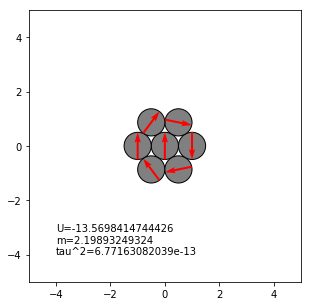

solution no.:2
solution:(3.116320552374602e-07, -7.056757466307903e-07, 3.071320111389274, 3.2118645568000566, 6.283186667573658, 3.0713177679891213, 3.2118668313837313)
nature = saddle point


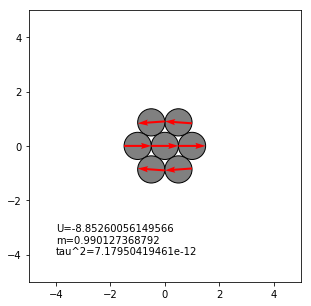

solution no.:3
solution:(1.5300564431039658, 5.025534903055047, -0.2661406235156575, 1.5580116992723525, 5.922614370282915, 0.04039124004001043, 2.842793473875115)
nature = saddle point


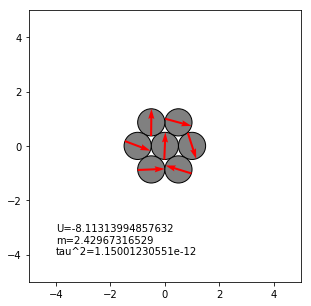

solution no.:4
solution:(-3.5630698842764727e-07, 6.122688674528175, 1.7780072059410141, 4.505179081973256, 0.1604983261747987, 2.9771801654452297, 3.306004870218455)
nature = saddle point


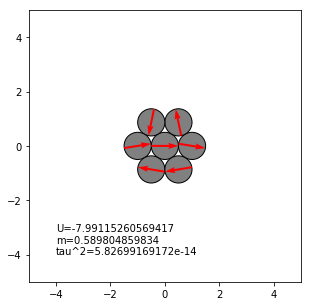

solution no.:5
solution:(0.36528238110394634, 5.307072595363818, 1.6882281633287903, 3.682877428177843, 6.190402535295911, 2.683590483888367, 3.5209079694442207)
nature = saddle point


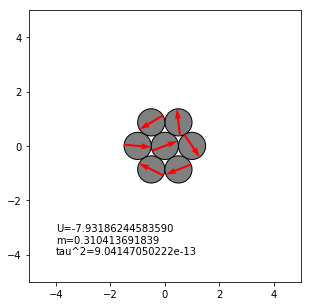

solution no.:6
solution:(0.5235987726994757, -0.8481296405877233, 1.8953274156884887, 3.665191426333735, 5.435055547973265, 1.8953271050182046, 3.665191411735521)
nature = saddle point


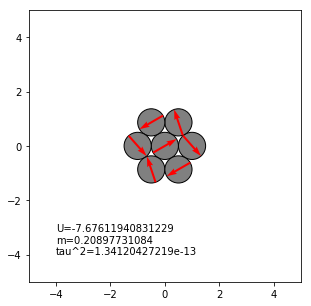

solution no.:7
solution:(-2.2125188053758555e-06, 3.141598884993272, 2.038738501561278, 3.5449651855049664, 6.283180694500512, 2.7382365484967988, 4.244442470434515)
nature = saddle point


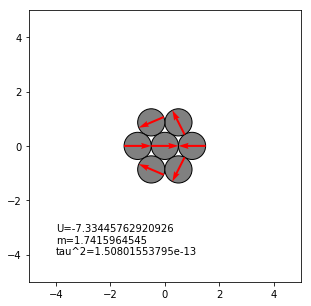

solution no.:8
solution:(-0.11203105493044148, 6.0036012104371395, 2.510975155987485, 0.8078180987187861, 1.0293803944401623, 2.5039155652946703, 3.561821307739334)
nature = saddle point


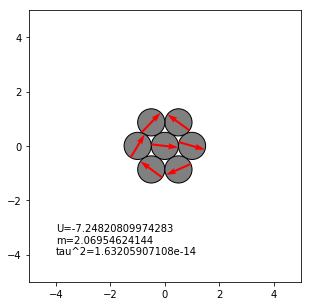

solution no.:9
solution:(6.363643282244901e-08, 3.141592361952819, 1.6294877177833988, 4.653697682266749, 3.1415926144036908, 1.6294876592027305, 4.653697764810952)
nature = saddle point


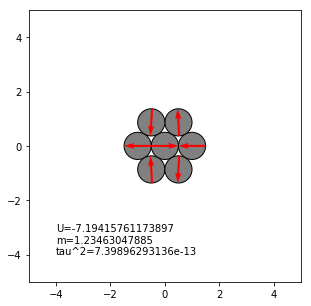

solution no.:10
solution:(-0.5235987312404713, 5.866296845683014, 5.7595865674607225, -0.6303088351778355, 5.866291254290443, -0.5235983784072725, 5.652881995132962)
nature = saddle point


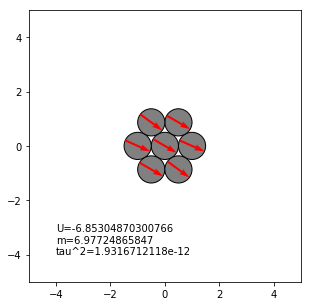

solution no.:11
solution:(1.2362646092146967, 5.341635363706725, 5.980197174191023, 1.4432219599459541, 6.096458356228072, 0.26763583028279414, -0.04105736529058002)
nature = saddle point


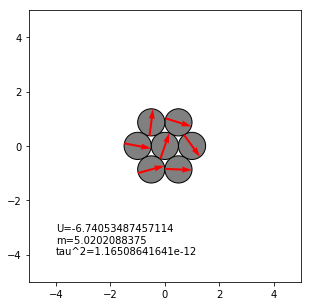

solution no.:12
solution:(0.3387408629154672, 5.377138789271633, 4.696494763409038, 4.184948099566558, 3.7958410076774327, 1.6763024025488487, 3.990533980222753)
nature = saddle point


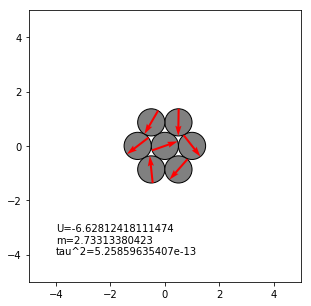

solution no.:13
solution:(-1.4723843671033026, 7.389654230018177, 6.0740803703375645, 5.280257531654568, 5.029608065043738, 5.27950701212519, 0.22701494865926816)
nature = saddle point


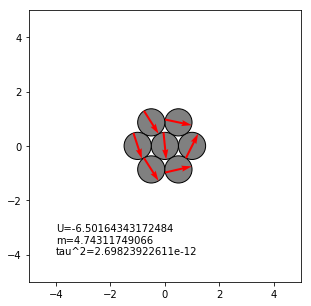

solution no.:14
solution:(0.08858355326846461, 1.6741096764255023, 1.8167645291722232, 1.3929954210288515, 0.8841757414731456, 2.312620547122566, 3.881855169643099)
nature = saddle point


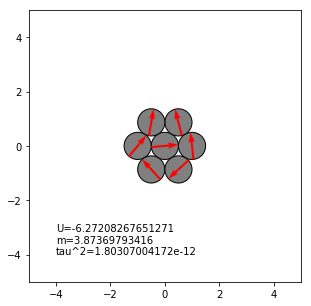

solution no.:15
solution:(0.5235987610160756, 6.395301396194974, 7.218266949945879, 5.341481574704966, 6.15185755149461, 1.1785248226103893, 8.272087633968294)
nature = saddle point


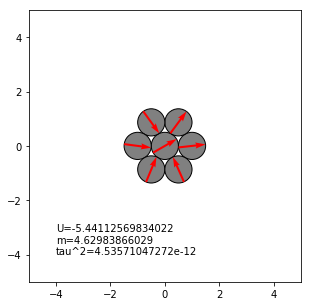

solution no.:16
solution:(0.6533288778587325, 2.119319017501089, 2.0578640863162376, 3.388029756141615, 2.119318149196328, 2.0578646121097335, 3.3880294139567066)
nature = saddle point


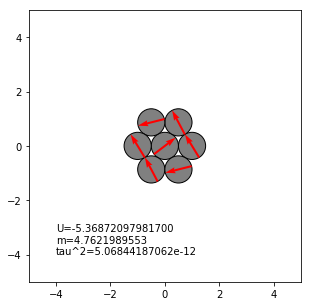

solution no.:17
solution:(0.041622737633553876, 7.208306275122197, 1.7039025563673371, 0.9769267414369938, 0.1369477004915461, 4.447826596696757, 1.4881478659734861)
nature = saddle point


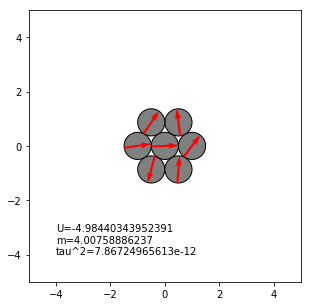

solution no.:18
solution:(-1.0471978286850374, 3.800554120281653, 3.8862746429315393, 2.094394873091125, 6.585700789950176, 6.671421299481424, 5.235987696422899)
nature = saddle point


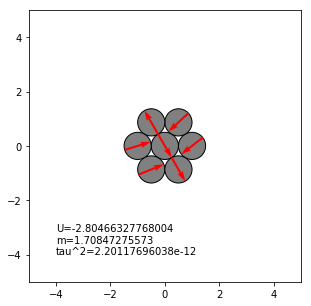

solution no.:19
solution:(0.8733979360712071, 2.093812493146948, 4.621979957494463, 1.7048154552712698, 1.0619018963949662, 2.2894731956456824, 3.510294579203451)
nature = saddle point


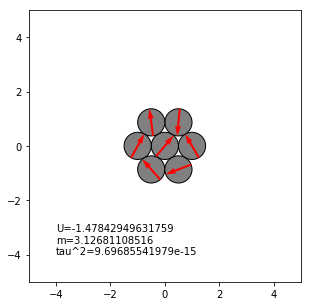

solution no.:20
solution:(-1.0471975307414925, 3.986963883912201, 3.4557345051029675, 5.235987648496769, 7.016241221436076, 0.2018264950270604, 5.235987877585601)
nature = saddle point


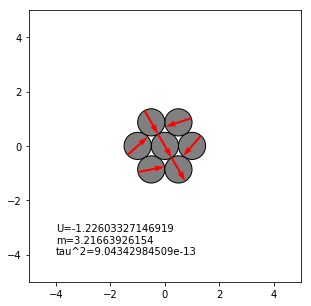

solution no.:21
solution:(-0.5235987721880135, 6.127807934979088, 4.367540402336214, 1.3191529455602884, 3.91683478850003, 0.86844734582973, 5.391365179945185)
nature = saddle point


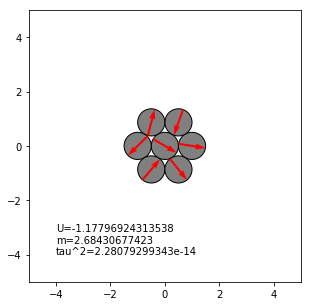

solution no.:22
solution:(0.5235981549679407, 6.158549722909348, -0.7357633422420761, 3.6651926941848596, 1.7829583796515136, 1.1718340601643582, 6.806786661818123)
nature = saddle point


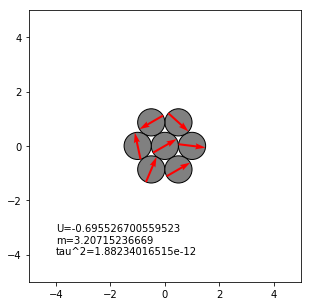

solution no.:23
solution:(-0.523598618094476, 2.754571906300359, 5.759586316423562, 2.4814155156377615, 5.864977026326771, 5.759586362196638, 5.654196204019339)
nature = saddle point


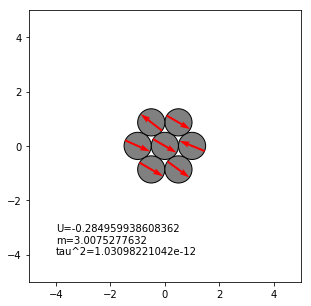

solution no.:24
solution:(6.119723802452902e-07, -1.1824051215651905e-06, 0.16243224820778396, 2.76951935419378, 6.283185312715431, 3.513665980664322, 6.120753414014499)
nature = saddle point


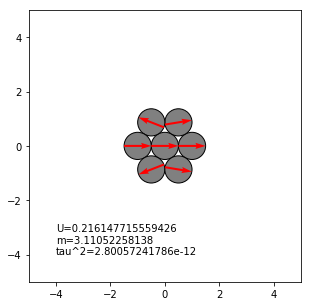

solution no.:25
solution:(0.5235987247313881, 4.402447712319905, 1.5736087860262535, 3.665191148601698, 5.7567747346464095, 2.9279353364961365, 6.806783999809701)
nature = saddle point


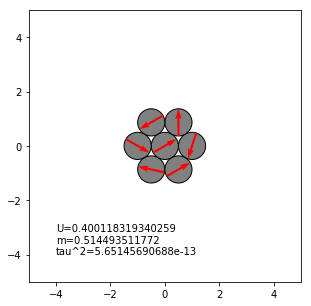

solution no.:26
solution:(-1.3726484270344337, 4.3731025551230935, 2.6931766257569287, 5.164123258969741, 6.918626132214008, 4.068207879744308, 7.563513953445866)
nature = saddle point


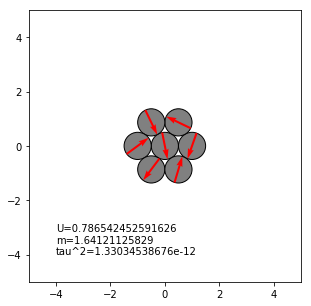

solution no.:27
solution:(1.6572928709740622, 15.808334711716633, 13.268359629942724, 5.8654086343740826, 5.2372323591408945, 2.9201614324488943, 6.396230803658728)
nature = saddle point


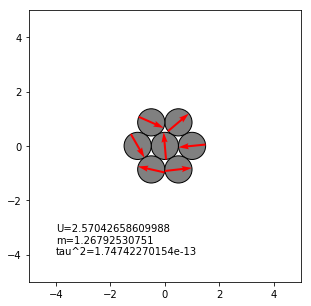

solution no.:28
solution:(0.9261810653883404, -1.3180816037891525, 6.381892453600501, 5.675731385273021, 2.8432542907286553, 4.114255728129692, 6.234071600369289)
nature = saddle point


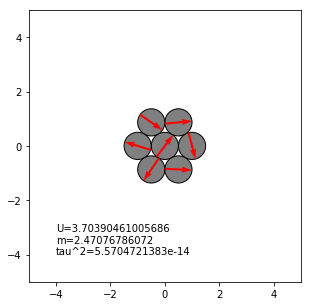

solution no.:29
solution:(0.4382709364787132, 6.621072886818743, 3.367597129516956, 0.7156140422746502, 3.11124635770088, 4.709047867693801, 1.9209461076209502)
nature = saddle point


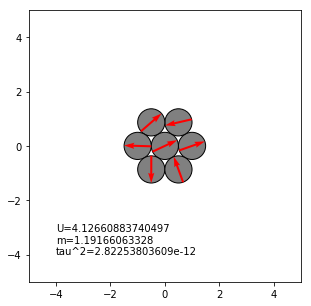

solution no.:30
solution:(1.587651324748119, 0.8386516542598447, 6.717845110780862, 5.948897905091518, 2.686179411830918, 4.260728072058804, 5.132563786908732)
nature = saddle point


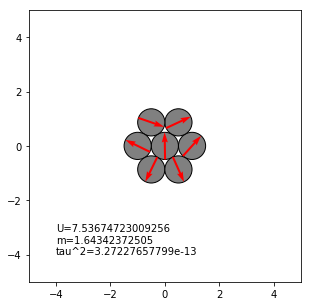

solution no.:31
solution:(0.005904805973596297, 3.1163026234744966, 5.121062900669218, 3.702224345810644, 1.9612742216619004, 2.121072586967707, 1.2276921681290718)
nature = saddle point


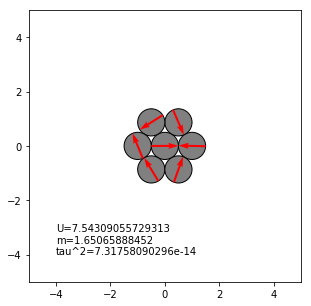

solution no.:32
solution:(1.5707969760974447, 0.3141250853779359, 0.9911339891098667, 2.150459201946921, 2.827467180692697, 4.1723788853058466, 5.252399055409134)
nature = saddle point


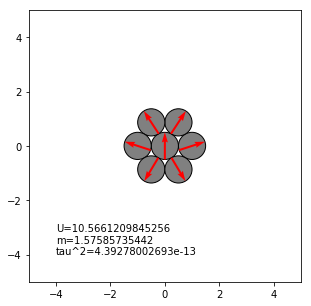

solution no.:33
solution:(0.5235977075933524, 2.2226196412761245, 4.305496174427537, 6.806784542454613, 3.0248873402451384, -1.175420531920054, 3.6651891716887564)
nature = saddle point


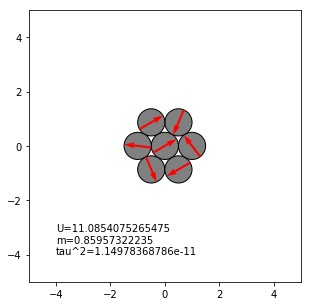

solution no.:34
solution:(0.5235987635338695, 2.063809618088873, 5.266573239178119, 3.6651914403918644, 2.0638096089053377, 5.266573267440476, 3.665191395357806)
nature = saddle point


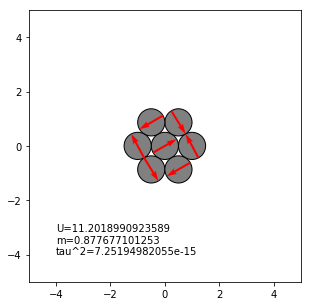

solution no.:35
solution:(0.5235989290304184, 2.195647987723305, 5.134734805239592, 1.4838494749506366, 3.2472969339929247, 4.083086183927713, -0.43665277711266126)
nature = saddle point


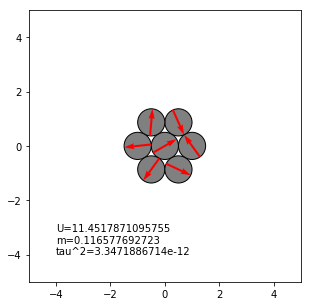

solution no.:36
solution:(1.4132609203555528, 0.7877421275933117, 3.3417714292884875, 0.2544961060663799, 3.052178912799355, 4.1479515785007, 5.160465396669874)
nature = saddle point


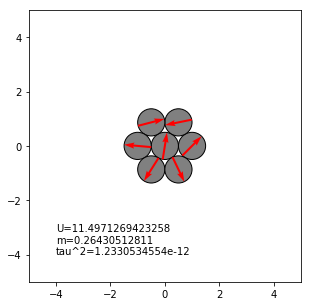

solution no.:37
solution:(-2.297175654511389, 5.666217406374857, 1.3054605251580855, 1.9090106187389597, 4.639484142029744, 2.523033369490442, -0.22577129936824183)
nature = saddle point


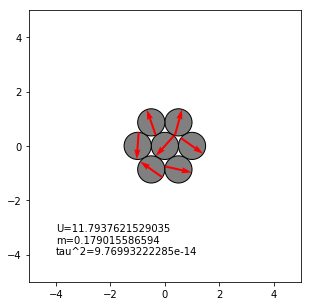

solution no.:38
solution:(0.09870834757039137, 3.103688776637479, 5.205570459307551, 1.7701887640809377, 3.2834194635256178, 4.064090223829125, 7.0042364630311065)
nature = saddle point


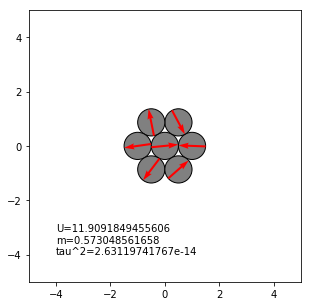

solution no.:39
solution:(-4.318209745520494e-07, 3.141592143974643, 4.201106492601764, 0.804878027570263, 3.1415930661676312, 5.478308594703474, 2.082080522789574)
nature = local maximum


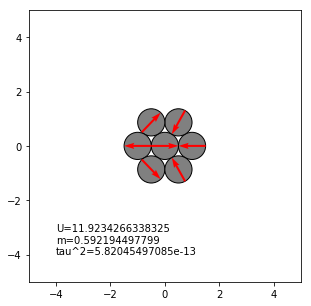

solution no.:40
solution:(-0.523598791327337, 2.7007358840768276, -0.5235987461160617, 2.535251906475215, 2.700735826156405, 5.7595865528708305, 2.5352518426664634)
nature = local maximum


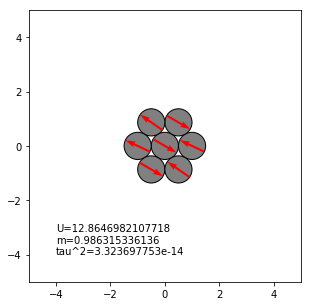

In [82]:

torque_cutoff = 0.0000000001
# ^^ we are quite confident that geniune solutions will have converged to within 10^-10 of zero 
candidate_sols = sorted_sols
n=1
for sol in candidate_sols:
    tau = f(sol[0], sol[1], sol[2], sol[3], sol[4], sol[5], sol[6]).n()
    if tau < torque_cutoff:
        print('solution no.:'+str(n))
        n = n + 1
        d_hex(sol)




solution no.:41
solution:(-0.11672452596354291, 3.3815266990548625, 1.9046296839475672, 3.942138102002788, -0.15440423455610938, 3.054006138161273, 4.196334226103659)
nature = saddle point


/opt/sagemath-8.7/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:7: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.


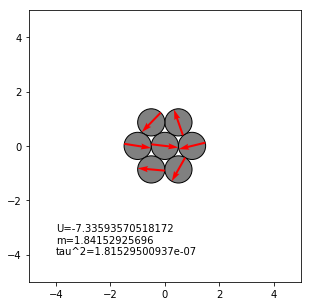

solution no.:42
solution:(1.809130079876295e-07, -2.3341082544728374e-07, 1.0927735033240882, 5.0683284756830105, 3.1415933802285405, 1.214856329455796, 5.190411559568056)
nature = saddle point


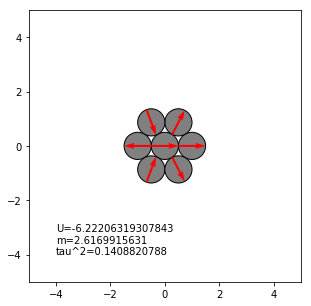

solution no.:43
solution:(-1.4655429172762273, 7.254564306823346, 3.334369321315621, 3.2478619698270084, 1.7136387125320236, 3.288985843500655, 2.1270814921793995)
nature = saddle point


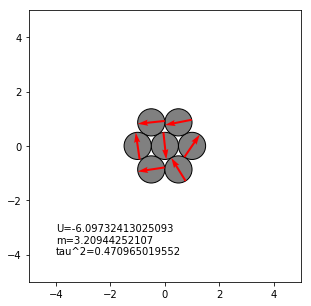

solution no.:44
solution:(3.261418427975923, 3.2719151007166722, 1.339766503197067, 4.237716041740985, 0.49037421891854854, 3.8496106073643284, 3.064305629794799)
nature = saddle point


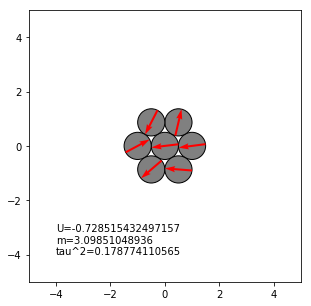

solution no.:45
solution:(0.6712451058699624, 2.033905960524229, 5.107022020320547, 4.099421718107865, 3.3037305580656398, 1.849280592235914, 3.7724470196680584)
nature = saddle point


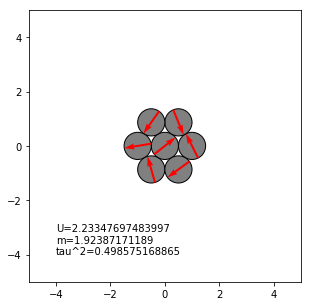

solution no.:46
solution:(0.5235987404031185, 4.788735725105663, 2.5416471893090833, 3.6178398020342994, 2.080337416866622, 5.250045415421285, 3.7125430941429562)
nature = saddle point


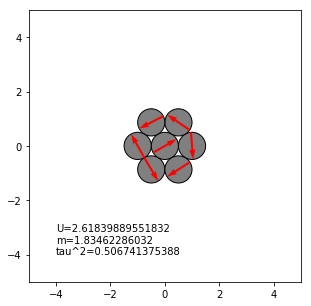

solution no.:47
solution:(1.0471975913069074, 5.07527904485133, 3.112036936791227, 6.125492269315469, 2.2520881292086963, 5.265543481722062, 3.302301328461043)
nature = saddle point


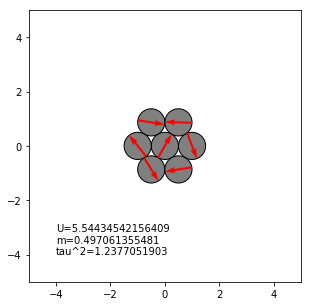

In [83]:
# display solutions which were rejected so we can check them
for sol in candidate_sols:
    tau = f(sol[0], sol[1], sol[2], sol[3], sol[4], sol[5], sol[6]).n()
    if tau >= torque_cutoff:
        print('solution no.:'+str(n))
        n = n + int(1)
        d_hex(sol)

In [24]:
# code for testing

def torque_array(Phi):
    a0, a1, a2, a3, a4, a5, a6 = Phi
    e= sqrt(3)
    torque_eqs = [1^-5*(3*(1*cos(a1)+0*sin(a1))*(cos(a0)*0-sin(a0)*1)) +1^-3*(cos(a1)*sin(a0)-sin(a1)*cos(a0))+1^-5*(3*(1/2*cos(a2)+1*e/2*sin(a2))*(cos(a0)*1*e/2-sin(a0)*1/2)) +1^-3*(cos(a2)*sin(a0)-sin(a2)*cos(a0))+1^-5*(3*(-3/6*cos(a3)+1*e/2*sin(a3))*(cos(a0)*1*e/2-sin(a0)*-3/6)) +1^-3*(cos(a3)*sin(a0)-sin(a3)*cos(a0))+1^-5*(3*(-6/6*cos(a4)+0*sin(a4))*(cos(a0)*0-sin(a0)*-6/6)) +1^-3*(cos(a4)*sin(a0)-sin(a4)*cos(a0))+1^-5*(3*(-3/6*cos(a5)+-3*e/6*sin(a5))*(cos(a0)*-3*e/6-sin(a0)*-3/6)) +1^-3*(cos(a5)*sin(a0)-sin(a5)*cos(a0))+1^-5*(3*(1/2*cos(a6)+-3*e/6*sin(a6))*(cos(a0)*-3*e/6-sin(a0)*1/2)) +1^-3*(cos(a6)*sin(a0)-sin(a6)*cos(a0)),\
    1^-5*(3*(-6/6*cos(a0)+0*sin(a0))*(cos(a1)*0-sin(a1)*-6/6)) +1^-3*(cos(a0)*sin(a1)-sin(a0)*cos(a1))+1^-5*(3*(-3/6*cos(a2)+1*e/2*sin(a2))*(cos(a1)*1*e/2-sin(a1)*-3/6)) +1^-3*(cos(a2)*sin(a1)-sin(a2)*cos(a1))+e/27*(3*(-6/4*cos(a3)+1*e/2*sin(a3))*(cos(a1)*1*e/2-sin(a1)*-6/4)) +e/9*(cos(a3)*sin(a1)-sin(a3)*cos(a1))+2^-5*(3*(-6/3*cos(a4)+0*sin(a4))*(cos(a1)*0-sin(a1)*-6/3)) +2^-3*(cos(a4)*sin(a1)-sin(a4)*cos(a1))+e/27*(3*(-6/4*cos(a5)+-3*e/6*sin(a5))*(cos(a1)*-3*e/6-sin(a1)*-6/4)) +e/9*(cos(a5)*sin(a1)-sin(a5)*cos(a1))+1^-5*(3*(-3/6*cos(a6)+-3*e/6*sin(a6))*(cos(a1)*-3*e/6-sin(a1)*-3/6)) +1^-3*(cos(a6)*sin(a1)-sin(a6)*cos(a1)),\
    1^-5*(3*(-3/6*cos(a0)+-3*e/6*sin(a0))*(cos(a2)*-3*e/6-sin(a2)*-3/6)) +1^-3*(cos(a0)*sin(a2)-sin(a0)*cos(a2))+1^-5*(3*(1/2*cos(a1)+-3*e/6*sin(a1))*(cos(a2)*-3*e/6-sin(a2)*1/2)) +1^-3*(cos(a1)*sin(a2)-sin(a1)*cos(a2))+1^-5*(3*(-6/6*cos(a3)+0*sin(a3))*(cos(a2)*0-sin(a2)*-6/6)) +1^-3*(cos(a3)*sin(a2)-sin(a3)*cos(a2))+e/27*(3*(-6/4*cos(a4)+-3*e/6*sin(a4))*(cos(a2)*-3*e/6-sin(a2)*-6/4)) +e/9*(cos(a4)*sin(a2)-sin(a4)*cos(a2))+2^-5*(3*(-6/6*cos(a5)+-6*e/6*sin(a5))*(cos(a2)*-6*e/6-sin(a2)*-6/6)) +2^-3*(cos(a5)*sin(a2)-sin(a5)*cos(a2))+e/27*(3*(0*cos(a6)+-6*e/6*sin(a6))*(cos(a2)*-6*e/6-sin(a2)*0)) +e/9*(cos(a6)*sin(a2)-sin(a6)*cos(a2)),\
    1^-5*(3*(1/2*cos(a0)+-3*e/6*sin(a0))*(cos(a3)*-3*e/6-sin(a3)*1/2)) +1^-3*(cos(a0)*sin(a3)-sin(a0)*cos(a3))+e/27*(3*(3/2*cos(a1)+-3*e/6*sin(a1))*(cos(a3)*-3*e/6-sin(a3)*3/2)) +e/9*(cos(a1)*sin(a3)-sin(a1)*cos(a3))+1^-5*(3*(1*cos(a2)+0*sin(a2))*(cos(a3)*0-sin(a3)*1)) +1^-3*(cos(a2)*sin(a3)-sin(a2)*cos(a3))+1^-5*(3*(-3/6*cos(a4)+-3*e/6*sin(a4))*(cos(a3)*-3*e/6-sin(a3)*-3/6)) +1^-3*(cos(a4)*sin(a3)-sin(a4)*cos(a3))+e/27*(3*(0*cos(a5)+-6*e/6*sin(a5))*(cos(a3)*-6*e/6-sin(a3)*0)) +e/9*(cos(a5)*sin(a3)-sin(a5)*cos(a3))+2^-5*(3*(1*cos(a6)+-6*e/6*sin(a6))*(cos(a3)*-6*e/6-sin(a3)*1)) +2^-3*(cos(a6)*sin(a3)-sin(a6)*cos(a3)),\
    1^-5*(3*(1*cos(a0)+0*sin(a0))*(cos(a4)*0-sin(a4)*1)) +1^-3*(cos(a0)*sin(a4)-sin(a0)*cos(a4))+2^-5*(3*(2*cos(a1)+0*sin(a1))*(cos(a4)*0-sin(a4)*2)) +2^-3*(cos(a1)*sin(a4)-sin(a1)*cos(a4))+e/27*(3*(3/2*cos(a2)+1*e/2*sin(a2))*(cos(a4)*1*e/2-sin(a4)*3/2)) +e/9*(cos(a2)*sin(a4)-sin(a2)*cos(a4))+1^-5*(3*(1/2*cos(a3)+1*e/2*sin(a3))*(cos(a4)*1*e/2-sin(a4)*1/2)) +1^-3*(cos(a3)*sin(a4)-sin(a3)*cos(a4))+1^-5*(3*(1/2*cos(a5)+-3*e/6*sin(a5))*(cos(a4)*-3*e/6-sin(a4)*1/2)) +1^-3*(cos(a5)*sin(a4)-sin(a5)*cos(a4))+e/27*(3*(3/2*cos(a6)+-3*e/6*sin(a6))*(cos(a4)*-3*e/6-sin(a4)*3/2)) +e/9*(cos(a6)*sin(a4)-sin(a6)*cos(a4)),\
    1^-5*(3*(1/2*cos(a0)+1*e/2*sin(a0))*(cos(a5)*1*e/2-sin(a5)*1/2)) +1^-3*(cos(a0)*sin(a5)-sin(a0)*cos(a5))+e/27*(3*(3/2*cos(a1)+1*e/2*sin(a1))*(cos(a5)*1*e/2-sin(a5)*3/2)) +e/9*(cos(a1)*sin(a5)-sin(a1)*cos(a5))+2^-5*(3*(1*cos(a2)+e*sin(a2))*(cos(a5)*e-sin(a5)*1)) +2^-3*(cos(a2)*sin(a5)-sin(a2)*cos(a5))+e/27*(3*(0*cos(a3)+e*sin(a3))*(cos(a5)*e-sin(a5)*0)) +e/9*(cos(a3)*sin(a5)-sin(a3)*cos(a5))+1^-5*(3*(-3/6*cos(a4)+1*e/2*sin(a4))*(cos(a5)*1*e/2-sin(a5)*-3/6)) +1^-3*(cos(a4)*sin(a5)-sin(a4)*cos(a5))+1^-5*(3*(1*cos(a6)+0*sin(a6))*(cos(a5)*0-sin(a5)*1)) +1^-3*(cos(a6)*sin(a5)-sin(a6)*cos(a5)),\
    1^-5*(3*(-3/6*cos(a0)+1*e/2*sin(a0))*(cos(a6)*1*e/2-sin(a6)*-3/6)) +1^-3*(cos(a0)*sin(a6)-sin(a0)*cos(a6))+1^-5*(3*(1/2*cos(a1)+1*e/2*sin(a1))*(cos(a6)*1*e/2-sin(a6)*1/2)) +1^-3*(cos(a1)*sin(a6)-sin(a1)*cos(a6))+e/27*(3*(0*cos(a2)+e*sin(a2))*(cos(a6)*e-sin(a6)*0)) +e/9*(cos(a2)*sin(a6)-sin(a2)*cos(a6))+2^-5*(3*(-6/6*cos(a3)+e*sin(a3))*(cos(a6)*e-sin(a6)*-6/6)) +2^-3*(cos(a3)*sin(a6)-sin(a3)*cos(a6))+e/27*(3*(-6/4*cos(a4)+1*e/2*sin(a4))*(cos(a6)*1*e/2-sin(a6)*-6/4)) +e/9*(cos(a4)*sin(a6)-sin(a4)*cos(a6))+1^-5*(3*(-6/6*cos(a5)+0*sin(a5))*(cos(a6)*0-sin(a6)*-6/6)) +1^-3*(cos(a5)*sin(a6)-sin(a5)*cos(a6))]
    return [x.n() for x in torque_eqs] # evaluate numerically

test = (1.973378658980664, 0.998083693363702, 6.01230155193543, 1.145904482094263, 6.72292920526922, 3.890451766786223, 5.16145340322297)
print(torque_array(test))
print(sum([x*x for x in torque_array(test)]))                                # sum of squares of torques computed from torque array
print(f(test[0], test[1], test[2], test[3], test[4], test[5], test[6]).n())  # same but from function used earlier
print(pot(test[0], test[1], test[2], test[3], test[4], test[5], test[6]).n())# potential energy

[-1.12481748942850e-7, 2.83997958899773e-8, -4.43037190100970e-7, 1.03475137264164e-7, -7.42206855974814e-8, -4.61781612060008e-7, 2.98348766358814e-7]
5.28210701891361e-13
5.28210702303735e-13
3.70390461005689
